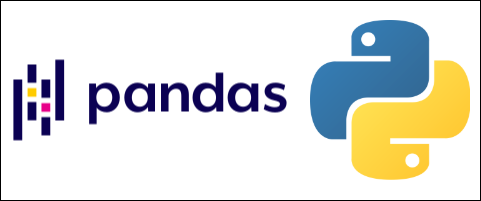

# <font color='green'> <b>Importing Libraries </b><font color='black'>

In [1]:
import numpy as np
import pandas as pd

# <font color='green'> <b>Groupby & Aggregation Methods (aggregate() & agg())</b><font color='black'>
    
groupby() is used to group a dataset by a specific column.

This function is used to divide data into groups and perform various operations on these groups.

For example, in a dataset containing customers' names, ages, and purchased products, you can use the groupby() function to group by the purchased product and find the average age for each product.

[Source01](https://towardsdatascience.com/all-pandas-groupby-you-should-know-for-grouping-data-and-performing-operations-2a8ec1327b5),
[Source02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html),
[Source03](https://naomi-fridman.medium.com/pandas-groupby-explained-with-titanic-6a1c47eb8182)
Pandas' aggregation methods perform operations on a specific dataset and return a result.

These methods perform various operations such as summing, averaging, finding the maximum or minimum value of the values in a dataset.

Some of Pandas' aggregation methods are:

**sum():** Returns the sum of all values in the specified column.

**mean():** Returns the average of all values in the specified column.

**median():** Calculates the median of the grouped data.

**mode():** Returns the most frequently occurring values in the specified column.

**max():** Returns the maximum value in the specified column.

**min():** Returns the minimum value in the specified column.

**count():** Returns the total number of values in the specified column.

**std():** Returns the standard deviation of the values in the specified column.

**var():** Returns the variance of the values in the specified column.

**describe():** Computes the statistical summary of the grouped data.

**idxmin():** Returns the first index containing the minimum value along the specified axis.

**idxmax():** Returns the first index containing the maximum value along the specified axis.

**corr():** Computes the correlation between columns, excluding NA/null values.

These methods can be used on a DataFrame or Series and can perform operations on the desired columns or rows.

Pandas' aggregation methods are very useful for analyzing data quickly and efficiently.

[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/frame.html)    

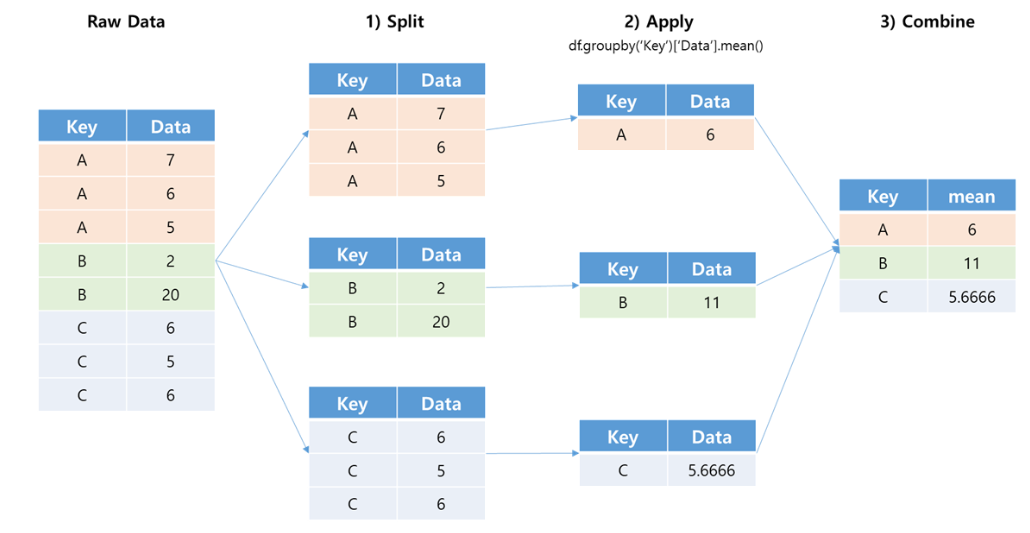
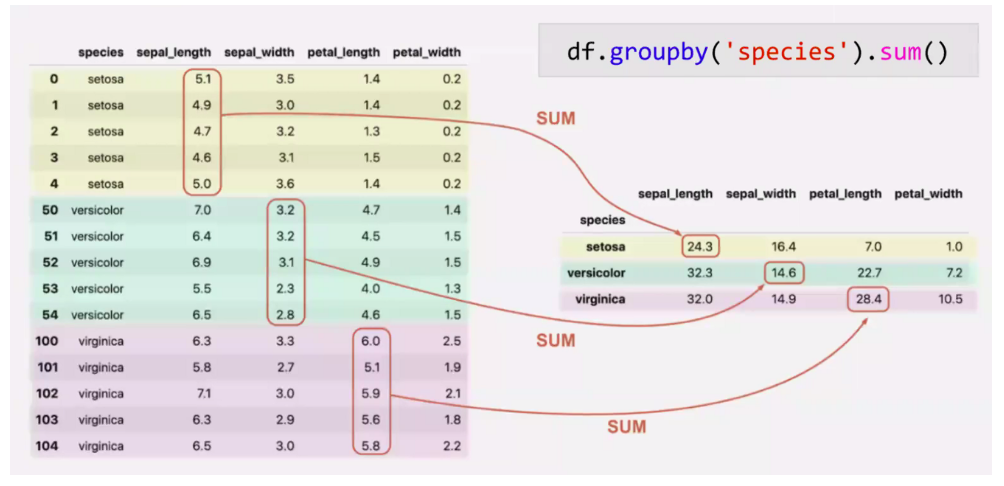
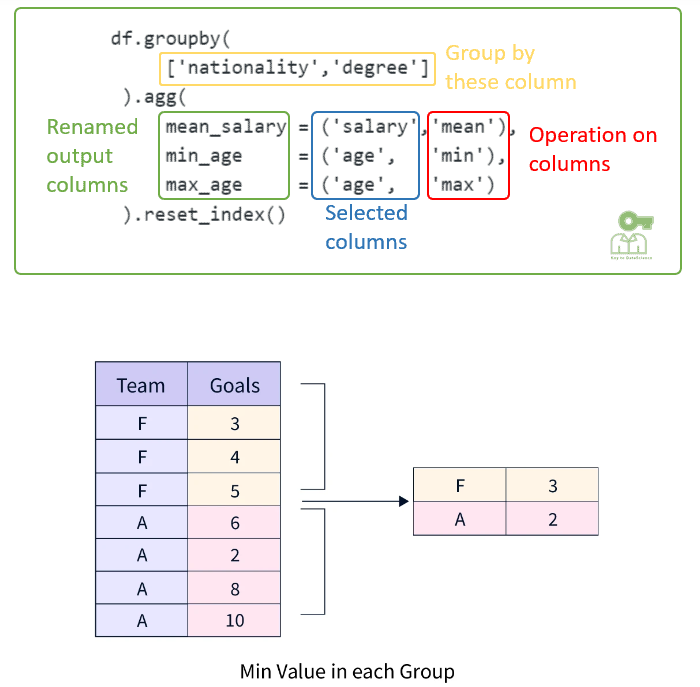
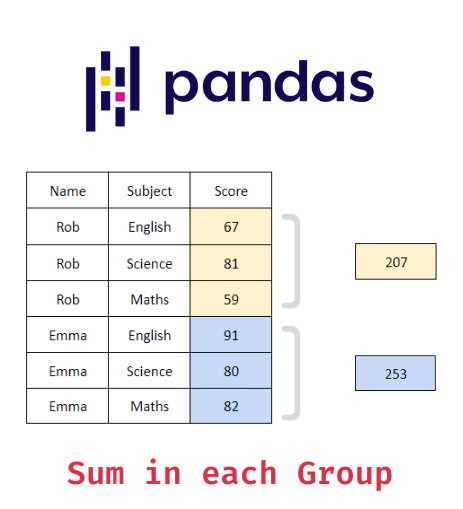

They are used to apply different functions (e.g., mean, sum, max) on a dataset grouped by a specific column or columns.

[aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html),
[agg](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html),
[SOURCE01](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/),
[SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/)
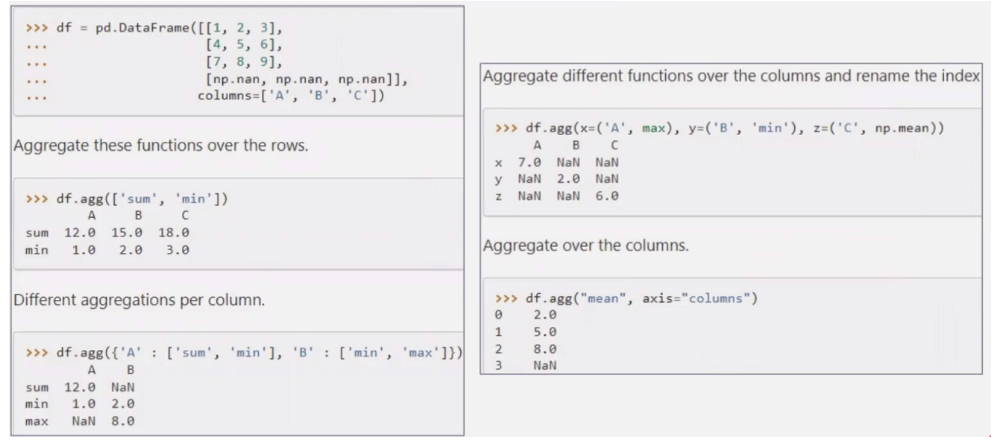
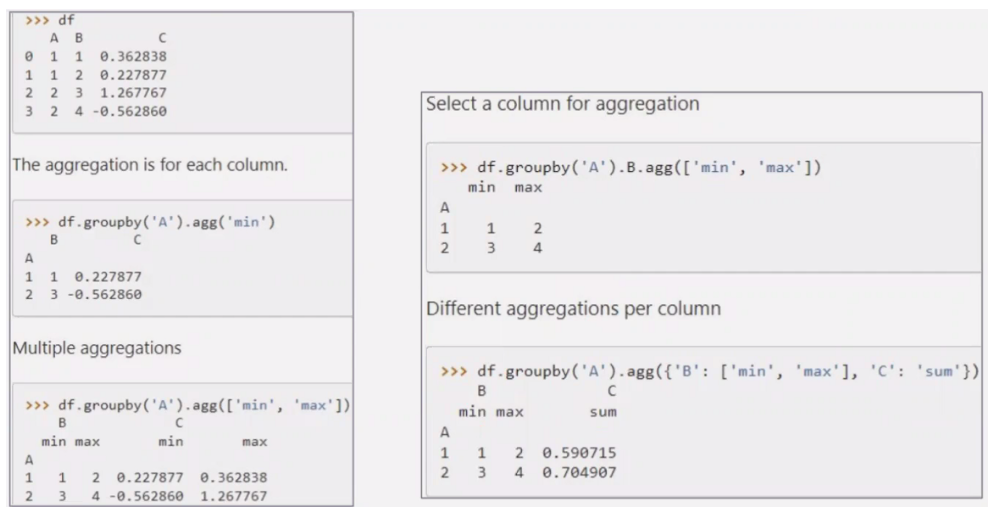

In [2]:
data = {'Company':['Amazon', 'Amazon', 'OpenAI', 'OpenAI', 'Amazon', 'OpenAI', 'Amazon', 'OpenAI'],
        'Department':['IT', 'HR', 'IT', 'HR', 'IT', 'HR', 'HR', 'IT'],
        'Person':['Ahmet', 'Ece', 'Fatma', 'Mehmet', 'Zeynep', 'Ali', 'Yusuf', 'Elif'],
        'Age':[32, 26, 35, 40, 25, 38, 30, 28],
        'Salary':[180, 160, 150, 180, 240, 200, 220, 160]}

In [3]:
df = pd.DataFrame(data)
df

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4  Amazon         IT  Zeynep   25     240
5  OpenAI         HR     Ali   38     200
6  Amazon         HR   Yusuf   30     220
7  OpenAI         IT    Elif   28     160

In [5]:
df.groupby("Company")[["Age"]].mean()

Age
Company       
Amazon   28.25
OpenAI   35.25

In [6]:
df.groupby("Company")[["Salary"]].mean()

Salary
Company        
Amazon    200.0
OpenAI    172.5

In [7]:
df.groupby("Company")[["Salary"]].agg([min, max, np.mean])

Salary            
           min  max   mean
Company                   
Amazon     160  240  200.0
OpenAI     150  200  172.5

In [8]:
df.groupby(["Company", "Department"])[["Salary"]].mean()  #Because we input 2 values into the groupby method, we need to enclose them in double parentheses.

Salary
Company Department        
Amazon  HR           190.0
        IT           210.0
OpenAI  HR           190.0
        IT           155.0

In [9]:
df[df.Age > 30]

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
5  OpenAI         HR     Ali   38     200

In [16]:
df[df.Age > 30].groupby("Company")[["Age"]].mean()

Age
Company           
Amazon   32.000000
OpenAI   37.666667

In [17]:
df.groupby("Company")[["Age"]].agg([min, max, np.mean])

Age           
        min max   mean
Company               
Amazon   25  32  28.25
OpenAI   28  40  35.25

In [19]:
df.select_dtypes(include=["number"])

Age  Salary
0   32     180
1   26     160
2   35     150
3   40     180
4   25     240
5   38     200
6   30     220
7   28     160

In [21]:
df.select_dtypes(include=["object"])

Company Department  Person
0  Amazon         IT   Ahmet
1  Amazon         HR     Ece
2  OpenAI         IT   Fatma
3  OpenAI         HR  Mehmet
4  Amazon         IT  Zeynep
5  OpenAI         HR     Ali
6  Amazon         HR   Yusuf
7  OpenAI         IT    Elif

In [10]:
df

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4  Amazon         IT  Zeynep   25     240
5  OpenAI         HR     Ali   38     200
6  Amazon         HR   Yusuf   30     220
7  OpenAI         IT    Elif   28     160

In [11]:
numeric_df = df.iloc[:, [0,3,4]]
numeric_df

Company  Age  Salary
0  Amazon   32     180
1  Amazon   26     160
2  OpenAI   35     150
3  OpenAI   40     180
4  Amazon   25     240
5  OpenAI   38     200
6  Amazon   30     220
7  OpenAI   28     160

In [23]:
numeric_df.groupby("Company").mean()

Age  Salary
Company               
Amazon   28.25   200.0
OpenAI   35.25   172.5

In [12]:
gruplama = numeric_df.groupby("Company")

In [25]:
gruplama.mean()

Age  Salary
Company               
Amazon   28.25   200.0
OpenAI   35.25   172.5

In [26]:
gruplama.corr()

Age    Salary
Company                           
Amazon  Age     1.000000 -0.221032
        Salary -0.221032  1.000000
OpenAI  Age     1.000000  0.593934
        Salary  0.593934  1.000000

# <font color='green'> <b>Useful Operations</b><font color='black'>

## <font color='blue'> <b>filter() & where()</b><font color='black'>

The **filter()** function is used to obtain a subset of a DataFrame or Series based on column or row labels. This is useful when you want to select specific columns or rows.

The **where()** function is used to retain values in a DataFrame or Series that meet a certain condition. Values that do not meet the condition become NaN (default) or can be replaced with another value optionally.

[Pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html),
[SOURCE01](https://www.sharpsightlabs.com/blog/pandas-filter/),
[SOURCE02](https://appdividend.com/2020/03/19/pandas-filter-pandas-dataframe-filter-in-python-example/),
[SOURCE03](https://www.geeksforgeeks.org/python-pandas-dataframe-where/)
    
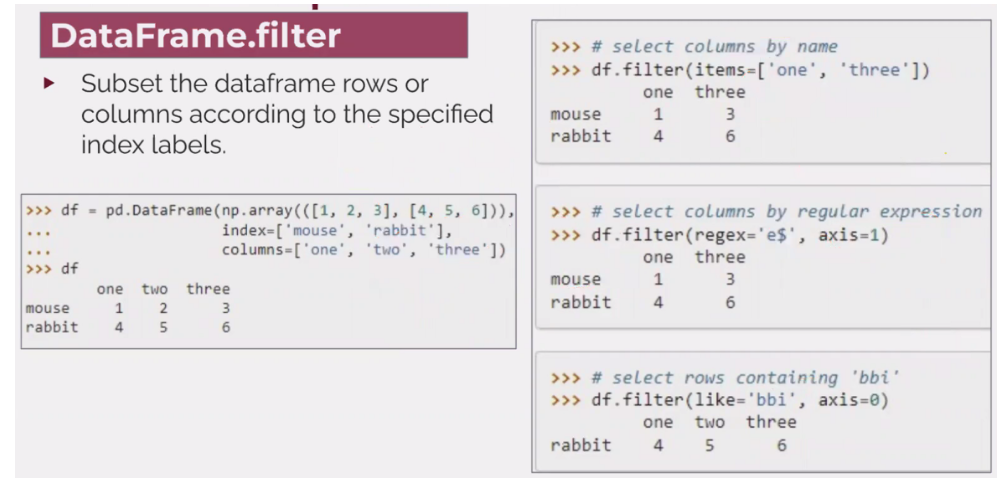
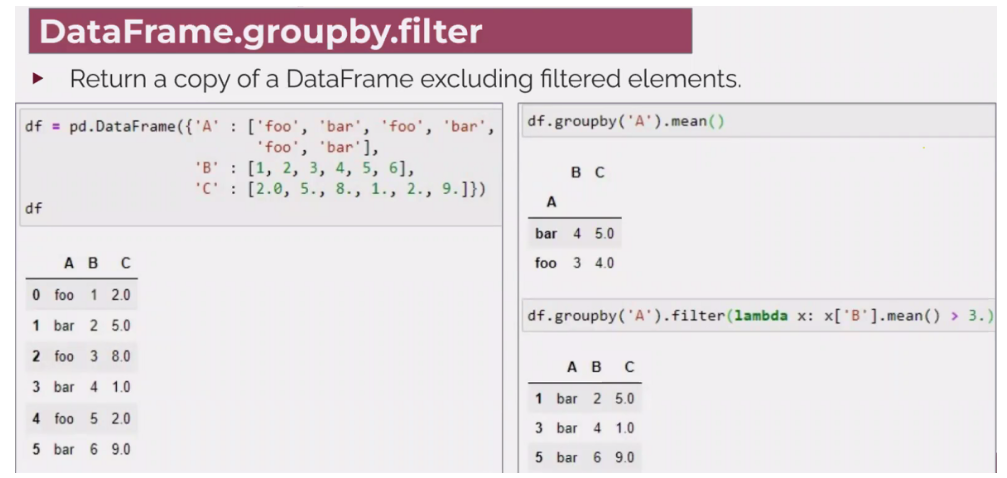

In [13]:
df = pd.DataFrame(data)
df

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4  Amazon         IT  Zeynep   25     240
5  OpenAI         HR     Ali   38     200
6  Amazon         HR   Yusuf   30     220
7  OpenAI         IT    Elif   28     160

In [30]:
df.groupby("Company")[["Age"]].mean()  #Here, we took the average of the age.


Age
Company       
Amazon   28.25
OpenAI   35.25

In [31]:
df.groupby("Company").filter(lambda x: x["Age"].mean() < 30) #Here, we applied a filter based on the company for those with an average age below 30.

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
4  Amazon         IT  Zeynep   25     240
6  Amazon         HR   Yusuf   30     220

In [32]:
df.groupby("Company")[["Salary"]].mean()

Salary
Company        
Amazon    200.0
OpenAI    172.5

In [38]:
df.groupby("Company").filter(lambda x: x["Salary"].mean() > 180)

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
4  Amazon         IT  Zeynep   25     240
6  Amazon         HR   Yusuf   30     220

## Where

In [39]:
df[df.Age > 30]

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
5  OpenAI         HR     Ali   38     200

In [14]:
df

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4  Amazon         IT  Zeynep   25     240
5  OpenAI         HR     Ali   38     200
6  Amazon         HR   Yusuf   30     220
7  OpenAI         IT    Elif   28     160

In [40]:
df.where(df.Age > 30) #the where() function retrieves the entire DataFrame, marking values as NaN where the condition isn't met.

Company Department  Person   Age  Salary
0  Amazon         IT   Ahmet  32.0   180.0
1     NaN        NaN     NaN   NaN     NaN
2  OpenAI         IT   Fatma  35.0   150.0
3  OpenAI         HR  Mehmet  40.0   180.0
4     NaN        NaN     NaN   NaN     NaN
5  OpenAI         HR     Ali  38.0   200.0
6     NaN        NaN     NaN   NaN     NaN
7     NaN        NaN     NaN   NaN     NaN

In [12]:
df.where(df.Age > 30, 0)

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1       0          0       0    0       0
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4       0          0       0    0       0
5  OpenAI         HR     Ali   38     200
6       0          0       0    0       0
7       0          0       0    0       0

In [14]:
df.where(df.Age > 30).dropna()  #with where(), we separate what we want.

Company Department  Person   Age  Salary
0  Amazon         IT   Ahmet  32.0   180.0
2  OpenAI         IT   Fatma  35.0   150.0
3  OpenAI         HR  Mehmet  40.0   180.0
5  OpenAI         HR     Ali  38.0   200.0

## <font color='blue'> <b>transform()</b><font color='black'>
    
transform() is a method used in pandas to change or transform data within a DataFrame or Series.

It applies the specified function and returns the result as a new Series or DataFrame.

It is particularly useful when used in conjunction with grouping operations.

[SOUREC01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html) & [SOURCE02](https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/)
    




In [15]:
df

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4  Amazon         IT  Zeynep   25     240
5  OpenAI         HR     Ali   38     200
6  Amazon         HR   Yusuf   30     220
7  OpenAI         IT    Elif   28     160

In [15]:
df.groupby("Department")[["Salary"]].mean()

Salary
Department        
HR           190.0
IT           182.5

In [17]:
df

Company Department  Person  Age  Salary
0  Amazon         IT   Ahmet   32     180
1  Amazon         HR     Ece   26     160
2  OpenAI         IT   Fatma   35     150
3  OpenAI         HR  Mehmet   40     180
4  Amazon         IT  Zeynep   25     240
5  OpenAI         HR     Ali   38     200
6  Amazon         HR   Yusuf   30     220
7  OpenAI         IT    Elif   28     160

In [16]:
df.groupby("Department")["Salary"].transform("mean")

0    182.5
1    190.0
2    182.5
3    190.0
4    182.5
5    190.0
6    190.0
7    182.5
Name: Salary, dtype: float64

In [17]:
df["Salary_mean"] = df.groupby("Department")["Salary"].transform("mean")
df

Company Department  Person  Age  Salary  Salary_mean
0  Amazon         IT   Ahmet   32     180        182.5
1  Amazon         HR     Ece   26     160        190.0
2  OpenAI         IT   Fatma   35     150        182.5
3  OpenAI         HR  Mehmet   40     180        190.0
4  Amazon         IT  Zeynep   25     240        182.5
5  OpenAI         HR     Ali   38     200        190.0
6  Amazon         HR   Yusuf   30     220        190.0
7  OpenAI         IT    Elif   28     160        182.5

In [20]:
df["difference"] = df.Salary - df.Salary_mean
df

Company Department  Person  Age  Salary  Salary_mean  difference
0  Amazon         IT   Ahmet   32     180        182.5        -2.5
1  Amazon         HR     Ece   26     160        190.0       -30.0
2  OpenAI         IT   Fatma   35     150        182.5       -32.5
3  OpenAI         HR  Mehmet   40     180        190.0       -10.0
4  Amazon         IT  Zeynep   25     240        182.5        57.5
5  OpenAI         HR     Ali   38     200        190.0        10.0
6  Amazon         HR   Yusuf   30     220        190.0        30.0
7  OpenAI         IT    Elif   28     160        182.5       -22.5

In [21]:
df.Salary.transform(lambda x: x* 1.2)

0    216.0
1    192.0
2    180.0
3    216.0
4    288.0
5    240.0
6    264.0
7    192.0
Name: Salary, dtype: float64

In [26]:
df["Newsalary"] = df.Salary.transform(lambda x: x* 1.2)
df

Company Department  Person  Age  Salary  Salary_mean  difference  Newsalary
0  Amazon         IT   Ahmet   32     180        182.5        -2.5      216.0
1  Amazon         HR     Ece   26     160        190.0       -30.0      192.0
2  OpenAI         IT   Fatma   35     150        182.5       -32.5      180.0
3  OpenAI         HR  Mehmet   40     180        190.0       -10.0      216.0
4  Amazon         IT  Zeynep   25     240        182.5        57.5      288.0
5  OpenAI         HR     Ali   38     200        190.0        10.0      240.0
6  Amazon         HR   Yusuf   30     220        190.0        30.0      264.0
7  OpenAI         IT    Elif   28     160        182.5       -22.5      192.0

## <font color='blue'> <b>apply() & applymap() & map()</b><font color='black'>
apply(): It is used to apply a function along a row or column of a DataFrame or Series.

applymap(): It is used for element-wise operations on an entire DataFrame.

map(): It can only be used with Series and is used for applying a function to each element of the Series.

[apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
[applymap](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.applymap.html)
[map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

[SOUREC01](https://www.geeksforgeeks.org/python-pandas-apply/), 
[SOURCE02](https://www.datacamp.com/community/tutorials/pandas-apply),
[SOURCE03](https://sparkbyexamples.com/pandas/pandas-apply-function-usage-examples/),
[SOURCE04](https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.),
[SOURCE05](https://www.w3resource.com/pandas/series/series-map.php),
[SOURCE06](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.),
[SOURCE07](https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas) &
[SOURCE08](https://medium.com/@akaivdo/how-to-use-map-apply-applymap-methods-in-pandas-ddde5f2140bd)


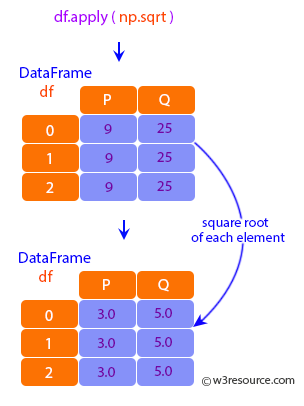
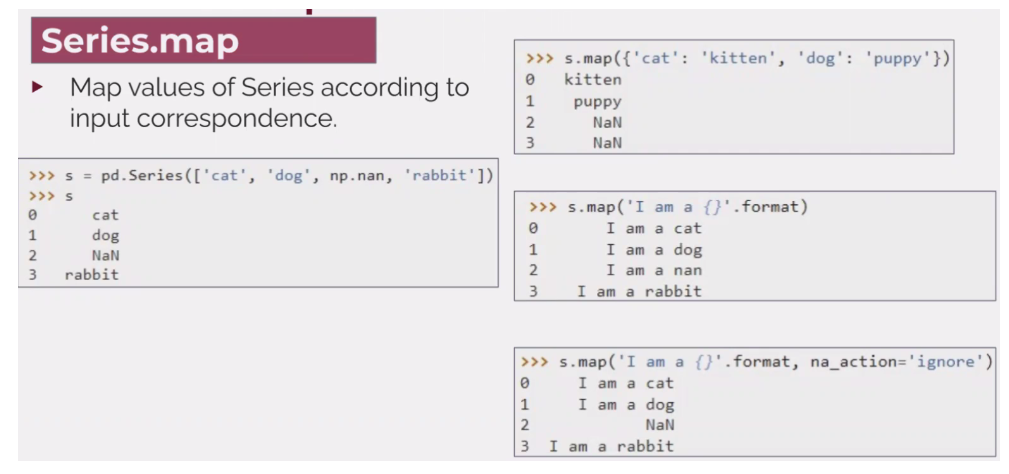

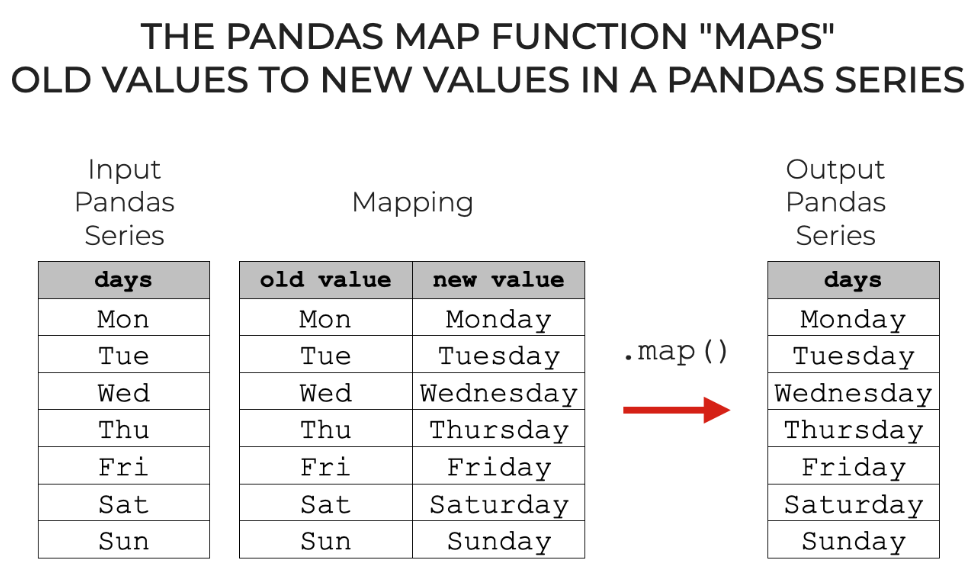

In [18]:
import seaborn as sns

In [19]:
titanic = sns.load_dataset("titanic")


In [20]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## Map

In [32]:
titanic.sex.map({"male": 0, "female": 1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [34]:
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [33]:
titanic.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [36]:
titanic.who.map({"man": 0, "woman": 1}).sample(20)

83     0.0
783    0.0
371    0.0
176    0.0
675    0.0
886    0.0
92     0.0
152    0.0
415    1.0
506    1.0
23     0.0
245    0.0
753    0.0
216    1.0
458    1.0
271    0.0
274    1.0
21     0.0
180    1.0
234    0.0
Name: who, dtype: float64

In [38]:
titanic.sex.map({"male": 0, "female": 1}).sample(20)

538    0
18     1
242    0
23     0
404    1
748    0
873    0
229    1
365    0
334    1
341    1
672    0
412    1
537    1
287    0
268    1
19     1
158    0
113    1
633    0
Name: sex, dtype: int64

## apply

In [39]:
df

Company Department  Person  Age  Salary  Salary_mean  difference  Newsalary
0  Amazon         IT   Ahmet   32     180        182.5        -2.5      216.0
1  Amazon         HR     Ece   26     160        190.0       -30.0      192.0
2  OpenAI         IT   Fatma   35     150        182.5       -32.5      180.0
3  OpenAI         HR  Mehmet   40     180        190.0       -10.0      216.0
4  Amazon         IT  Zeynep   25     240        182.5        57.5      288.0
5  OpenAI         HR     Ali   38     200        190.0        10.0      240.0
6  Amazon         HR   Yusuf   30     220        190.0        30.0      264.0
7  OpenAI         IT    Elif   28     160        182.5       -22.5      192.0

In [40]:
numeric_df

Company  Age  Salary
0  Amazon   32     180
1  Amazon   26     160
2  OpenAI   35     150
3  OpenAI   40     180
4  Amazon   25     240
5  OpenAI   38     200
6  Amazon   30     220
7  OpenAI   28     160

In [21]:
df_new = df.iloc[:, [3,4]]
df_new

Age  Salary
0   32     180
1   26     160
2   35     150
3   40     180
4   25     240
5   38     200
6   30     220
7   28     160

In [43]:
df_new.apply(np.sum)

Age        254
Salary    1490
dtype: int64

In [44]:
df_new.apply(np.sum, axis = 1)  #summed up the age and salary.

0    212
1    186
2    185
3    220
4    265
5    238
6    250
7    188
dtype: int64

In [45]:
df_new

Age  Salary
0   32     180
1   26     160
2   35     150
3   40     180
4   25     240
5   38     200
6   30     220
7   28     160

In [49]:
df_new.apply(lambda x : x * 10)

Age  Salary
0  320    1800
1  260    1600
2  350    1500
3  400    1800
4  250    2400
5  380    2000
6  300    2200
7  280    1600

## Applymap

In [50]:
df_new.applymap(lambda x : x * 10) #It doesn't work with series.

Age  Salary
0  320    1800
1  260    1600
2  350    1500
3  400    1800
4  250    2400
5  380    2000
6  300    2200
7  280    1600

In [51]:
df_new

Age  Salary
0   32     180
1   26     160
2   35     150
3   40     180
4   25     240
5   38     200
6   30     220
7   28     160

In [52]:
df_new.applymap(lambda x: x < 35)

Age  Salary
0   True   False
1   True   False
2  False   False
3  False   False
4   True   False
5  False   False
6   True   False
7   True   False